In [ ]:
%%bash
pip install numpy
pip install pandas
pip install seaborn
pip install mlxtend
pip install arch

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import re
from textwrap import wrap
import matplotlib.ticker
import os
import seaborn as sns
sns.color_palette("bright", 8)
sns.set_palette("bright")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {'axes.grid' : False})

In [4]:
def append_vars(ds, cols):
    v=ds[cols]
    X=ds.drop(columns=cols)
    return pd.concat([X.assign(cfu=ds[col], name=ds['year'].apply(lambda y: f"{col} {y}")) for col in cols]).dropna()

In [5]:
def save_plot(fname):
    plt.savefig(f"plots/{fname}.svg")
    plt.savefig(f"plots/{fname}.png")

In [6]:
import matplotlib.ticker as mtick

def make_dfs(df,fname):
    colors = ['#000A9C', '#5B0094', '#005903', '#68DFFC', '#4275FF', '#C973FF', '#A2FCA5']
    fig, ax = plt.subplots(figsize=(16,8))
    #sns.set_palette(colors)
    ax=sns.stripplot(x='week', y='cfu', hue='name', data=df,  alpha=1, size=12, linewidth=1, edgecolor='w', palette=colors)
    #ax=sns.scatterplot(x='week', y='cfu', hue='name', data=c,  alpha=0.8, size= 14, linewidth=1, edgecolor='w')
    plt.axvline(x=1.42, color='b', linestyle='-.', alpha=0.8)
    plt.axvline(x=3.7, color='b', linestyle='-.', alpha=0.8)
    ax.text(2.56, 1960,  "Jazz 2016", ha="center", va="center", size=16, color='b')
    ax.annotate("", xy=(1.42, 1900), xycoords='data',
               xytext=(3.7, 1900), textcoords='data',
               arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3", color='b', alpha=0.8))
    plt.axvline(x=2.4, color='r', linestyle='-.', alpha=0.8)
    plt.axvline(x=4.58, color='r', linestyle='-.', alpha=0.8)
    ax.text(3.4, 2240,  "Jazz 2017", ha="center", va="center", size=14, color='r')
    ax.annotate("", xy=(2.4, 2200), xycoords='data',
               xytext=(4.58, 2200), textcoords='data',
               arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3", color='r', alpha=0.8))
    ax.xaxis.grid(which="major", color='b', linewidth=0.7, alpha=0.1)
    ax.set_xlabel("Sample weeks 2016, 2017 and 2020", size=16, labelpad=20)
    ax.set_ylabel("Colony forming units per 100mL", size=16, labelpad=20)
    plt.suptitle("Montreux large events and the occurrence of bacteria in lake water" , fontsize=16, family='sans')
    plt.title("Colonies grouped by year and week number", fontsize=16, family='sans', y=1.03)
    ax.legend(loc='upper right', fontsize=14)
    save_plot(fname)

In [7]:
A=pd.read_pickle("data/allyears-avg_plate.pkl")
A['Date_dt'] = pd.to_datetime(A['Date'])
R=pd.read_csv('data/rain_all.csv')
A2=append_vars(A,['Bioindicator', 'Bioindicator UV+', 'Coliform'])

In [8]:
A

,Date,Location,festival,rooms,year,rain,Bioindicator,Coliform,total,week,Bioindicator UV+,Date_dt
0,2016-06-21,MRD,before,3069.600000,16,0.0,66.666667,466.666667,900.000000,1,NaN,2016-06-21
1,2016-06-21,SVT,before,3069.600000,16,0.0,33.333333,33.333333,133.333333,1,NaN,2016-06-21
2,2016-06-21,VNX,before,3069.600000,16,0.0,0.000000,0.000000,66.666667,1,NaN,2016-06-21
3,2016-06-28,MRD,before,3069.600000,16,1.6,8.333333,25.000000,491.666667,2,NaN,2016-06-28
4,2016-06-28,SVT,before,3069.600000,16,1.6,0.000000,8.333333,391.666667,2,NaN,2016-06-28
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020-07-22,SVT,before,8058.967742,20,7.8,100.000000,1000.000000,6066.666667,7,NaN,2020-07-22
68,2020-07-22,VNX,before,8058.967742,20,7.8,0.000000,200.000000,666.666667,7,NaN,2020-07-22
69,2020-08-06,MRD,before,7890.741935,20,1.8,0.000000,233.333333,3100.000000,8,NaN,2020-08-06
70,2020-08-06,SVT,before,7890.741935,20,1.8,166.666667,633.333333,3366.666667,8,NaN,2020-08-06


## Year over year 2016 2017 and 2020

### Bioindicator + Coliform

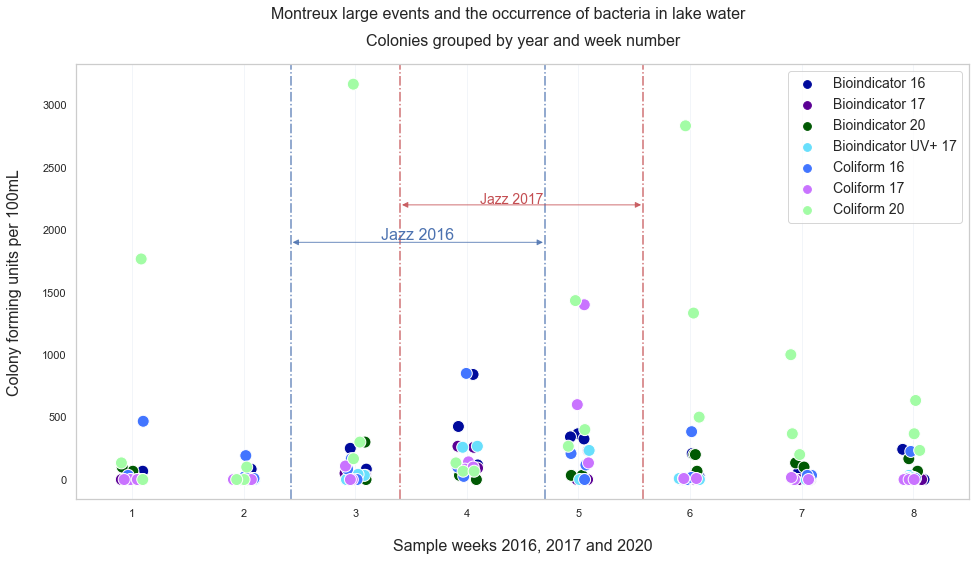

In [9]:
make_dfs(A2,'YEAR_OVER_YEAR_CFUINCREASE_JAZZ_2016_2017_2020')

In [13]:
#make_dfs(A2[A2.name.str.contains('Bioindicator')],'YEAR_OVER_YEAR_CFUINCREASE_JAZZ_2016_2017_2020')

## Year over year 2016 2017 

In [10]:
def make_dfs_2016_2017(df,fname):
    #colors = ['#00008b', '#1e90ff', '#40e0d0', 'g', 'y']
    colors = ['#000A9C', '#5B0094', '#68DFFC', '#4275FF', '#C973FF']
    fig, ax = plt.subplots(figsize=(16,8))
    #sns.set_palette(colors)
    ax=sns.stripplot(x='week', y='cfu', hue='name', data=df,  alpha=0.8, size=12, linewidth=1, edgecolor='w', palette=colors)
   #ax=sns.scatterplot(x='week', y='cfu', hue='name', data=c,  alpha=0.8, size= 14, linewidth=1, edgecolor='w')
    plt.axvline(x=1.42, color='b', linestyle='-.', alpha=0.8)
    plt.axvline(x=3.7, color='b', linestyle='-.', alpha=0.8)
    ax.text(2.56, 600,  "Jazz 2016", ha="center", va="center", size=14, color='b')
    ax.annotate("", xy=(1.42, 580), xycoords='data',
               xytext=(3.7, 580), textcoords='data',
               arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3", color='b', alpha=0.8))
    plt.axvline(x=2.4, color='r', linestyle='-.', alpha=0.8)
    plt.axvline(x=4.58, color='r', linestyle='-.', alpha=0.8)
    ax.text(3.4, 800,  "Jazz 2017", ha="center", va="center", size=14, color='r')
    ax.annotate("", xy=(2.4, 780), xycoords='data',
               xytext=(4.58, 780), textcoords='data',
               arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3", color='r', alpha=0.8))
    ax.xaxis.grid(which="major", color='b', linewidth=0.7, alpha=0.1)
    ax.set_xlabel("Sample weeks 2016, 2017", size=16, labelpad=20)
    ax.set_ylabel("Colony forming units per 100mL", size=16, labelpad=20)
    plt.suptitle("Montreux large events and the occurrence of bacteria in lake water" , fontsize=16, family='sans')
    plt.title("Colonies grouped by year and week number", fontsize=16, family='sans', y=1.03)
    ax.legend(loc='upper right', fontsize=14)
    save_plot(fname)

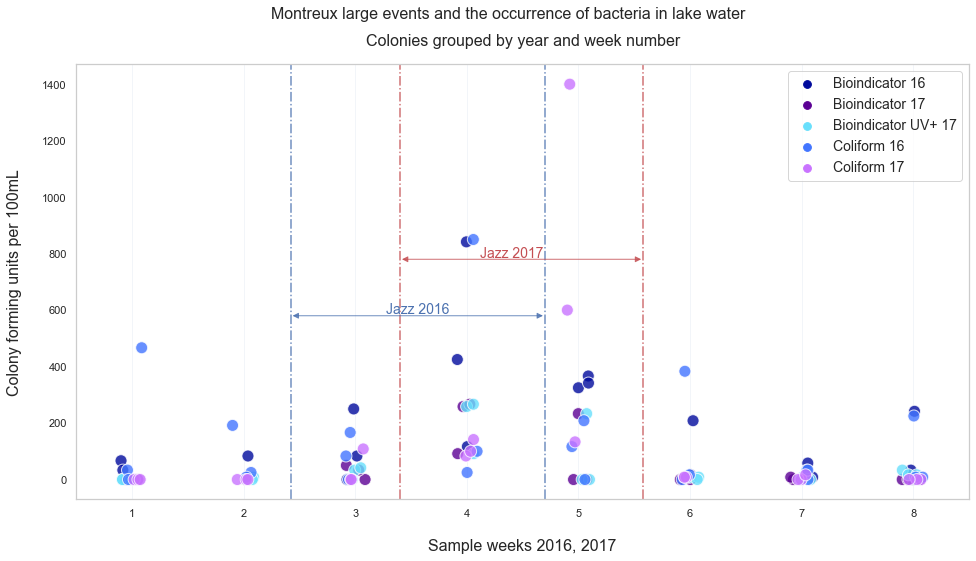

In [11]:
make_dfs_2016_2017(A2.query('year != 20'),'YEAR_OVER_YEAR_CFUINCREASE_JAZZ_2016_2017')

## Problem with 0 values

In [13]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

A=pd.read_pickle("data/allyears.pkl")


## Rain plots

In [12]:
def plot_with_rain(df,col_name, rain, sup_title, title, filename):
    mindate=df['Date'].min()
    R=rain.query(f"Date>'{mindate}'")
    collss=['darkred', 'darkblue', 'teal']
    fig, ax1 = plt.subplots(figsize=(10,6), edgecolor='midnightblue')
    
    ax1.bar(pd.to_datetime(R['Date']).values, R['Rain'].values, color='lightskyblue', width=0.99, alpha=0.4, label="mm of rain")
    
    ax2 = ax1.twinx() 

    ylim = [1]
    for i, n in enumerate(df['Location'].unique()):
        yn=df.query(f"Location=='{n}'")
        maxn = yn[col_name].max()
        ratio = yn[col_name].std()/maxn
        for index, row in yn.iterrows():
            t, c, j = ax2.errorbar(row['Date_dt'], row[col_name], yerr=row[col_name]*ratio, capsize=2, alpha=0.4, ecolor='magenta',)
            for k in j:
                k.set_linestyle('--')
            for cap in c:
                cap.set_marker("o")
        ax2.plot(yn['Date_dt'], yn[col_name], label=n, color=collss[i], linewidth=3)
        if maxn > max(ylim):
            ylim.append(maxn)
        ax2.set_ylim(bottom=0, top=max(ylim)+100)

 
      
    for pos in ['bottom', 'top', 'left', 'right']:
        ax1.spines[pos].set_color('midnightblue')
    ax1.grid(which='major', color='midnightblue', linestyle='--', alpha=0.2, axis='y')
    ax1.tick_params(axis='both', which='both', color='midnightblue')
    
    
    
    ax2.set_ylabel('$\itE. coli$ colony forming units per 100mL', labelpad=10, fontsize=14)
    #ax2.yaxis.set_label_position("left")
    ax2.yaxis.tick_left()
    ax2.yaxis.set_label_position("left")

    ax1.set_ylabel('Millimeters of rain per day', labelpad=10, fontsize=14)
    #ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()
    ax1.yaxis.set_label_position("right")
    
    fig.legend( loc=(0.74, 0.55), frameon=True, fontsize=12, edgecolor='midnightblue', framealpha=0.8 )
    
    plt.xticks(df['Date'].unique(), [f"Week {i+1}" for i in range(8)], fontsize=11 )
    plt.suptitle(sup_title, fontsize=16, family='sans')
    plt.title(title, fontsize=16, family='sans', y=1.03)
    plt.subplots_adjust(top=0.85)
    save_plot(filename)
    plt.show()

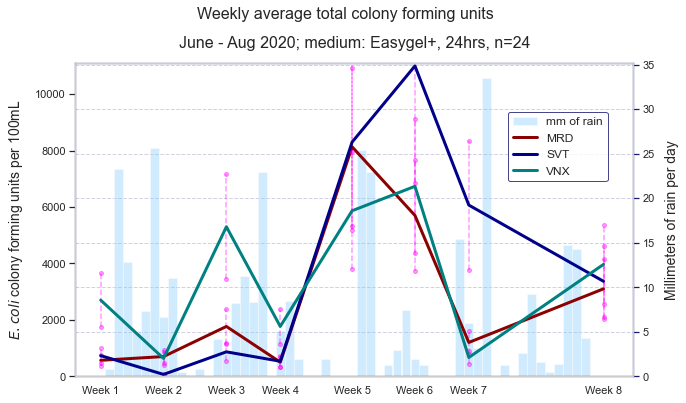

In [13]:
plot_with_rain(A.query('year == 20'),'total',R.query('year == 20'),
               'Weekly average total colony forming units',
               'June - Aug 2020; medium: Easygel+, 24hrs, n={}'.format(len(A.query('year == 20'))),
               '2020_AVG_Total_CFU_week')

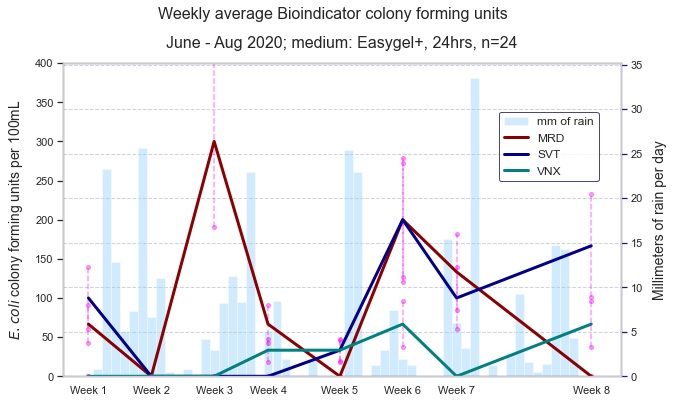

In [14]:
plot_with_rain(A.query('year == 20'),'Bioindicator',R.query('year == 20'),
                'Weekly average Bioindicator colony forming units',
               'June - Aug 2020; medium: Easygel+, 24hrs, n={}'.format(len(A.query('year == 20'))),
                '2020_AVG_Bioindicator_CFU_week')

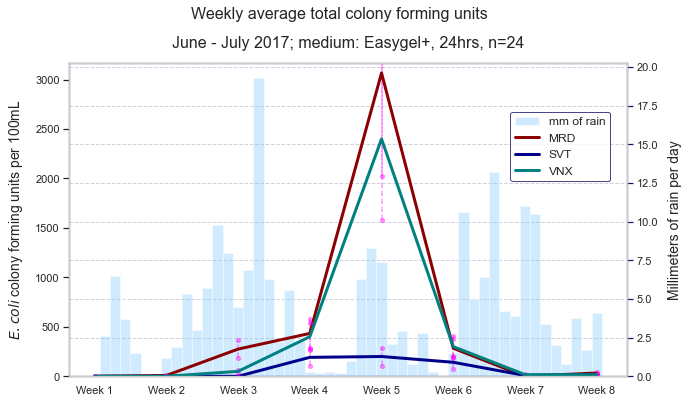

In [168]:
plot_with_rain(A.query('year == 17'),'total',R.query('year == 17'),  
               'Weekly average total colony forming units', 
               'June - July 2017; medium: Easygel+, 24hrs, n={}'.format(len(A.query('year == 17'))), 
               '2017_AVG_Total_CFU_week')

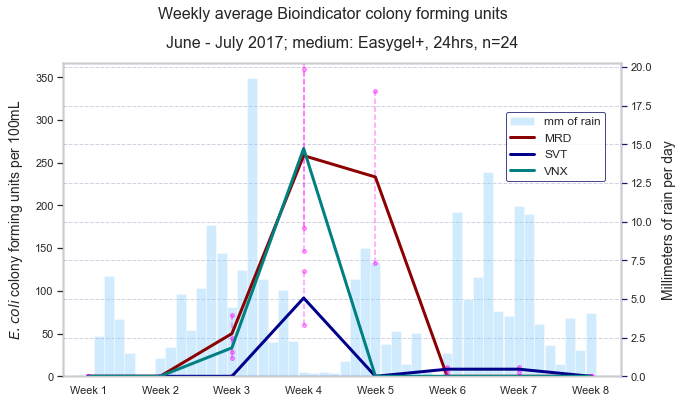

In [169]:
plot_with_rain(A.query('year == 17'),'Bioindicator',R.query('year == 17'), 
               'Weekly average Bioindicator colony forming units',
               'June - July 2017; medium: Easygel+, 24hrs, n={}'.format(len(A.query('year == 17'))),
               '2017_AVG_BigBlue_CFU_week')

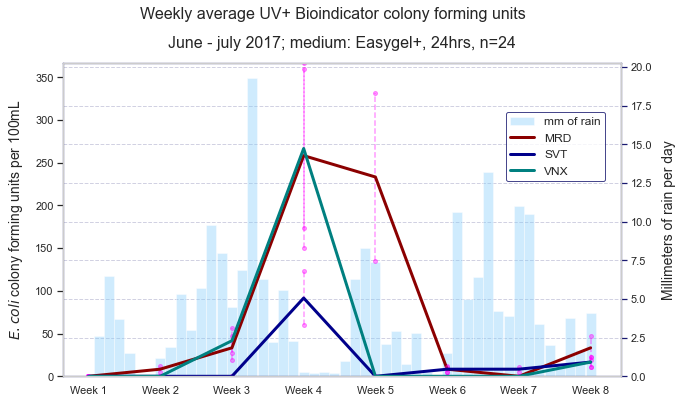

In [170]:
plot_with_rain(A.query('year == 17'),'Bioindicator UV+',R.query('year == 17'),
               'Weekly average UV+ Bioindicator colony forming units',
               'June - july 2017; medium: Easygel+, 24hrs, n={}'.format(len(A.query('year == 17'))),
               '2017_AVG_UltraViolet_CFU_week')

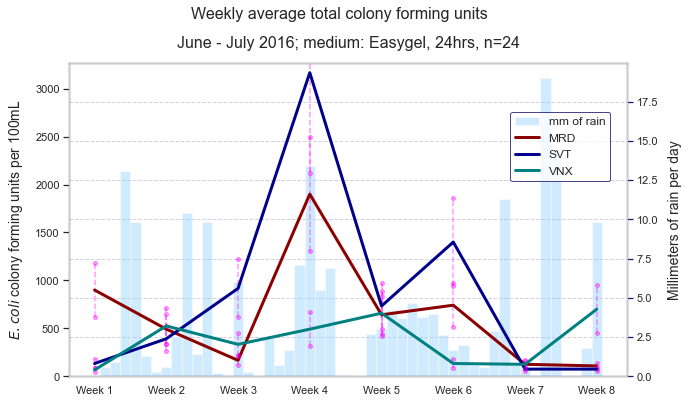

In [171]:
plot_with_rain(A.query('year == 16'),'total',R.query('year == 16'),
               'Weekly average total colony forming units', 
                'June - July 2016; medium: Easygel, 24hrs, n={}'.format(len(A.query('year == 16'))), 
                '2016_AVG_Total_CFU_week_16')

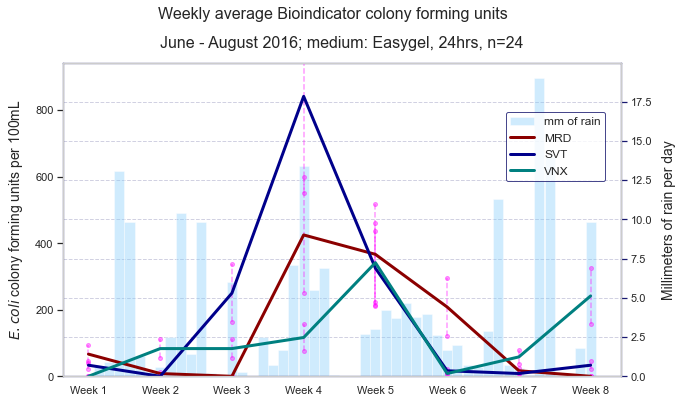

In [172]:
plot_with_rain(A.query('year == 16'),'Bioindicator',R.query('year == 16'),
               'Weekly average Bioindicator colony forming units',
                'June - August 2016; medium: Easygel, 24hrs, n={}'.format(len(A.query('year == 16'))),
                '2016_AVG_BigBlue_CFU_week')

## Rain 72hours sum graph

In [17]:
rain_sum_df = A2.groupby(['name','Date']).sum().reset_index()
rain_sum_df

,name,Date,rooms,year,rain,total,week,cfu
0,Bioindicator 16,2016-06-21,9208.800000,48,0.0,1100.000000,3,100.000000
1,Bioindicator 16,2016-06-28,9208.800000,48,4.8,1408.333333,6,91.666667
2,Bioindicator 16,2016-07-05,11703.483871,48,0.9,1416.666667,9,333.333333
3,Bioindicator 16,2016-07-12,24176.903226,48,26.4,5558.333333,12,1383.333333
4,Bioindicator 16,2016-07-19,24176.903226,48,8.1,2033.333333,15,1033.333333
5,Bioindicator 16,2016-07-26,24176.903226,48,19.8,2275.000000,18,233.333333
6,Bioindicator 16,2016-08-02,24176.903226,48,36.0,325.000000,21,83.333333
7,Bioindicator 16,2016-08-09,23672.225806,48,5.4,883.333333,24,275.000000
8,Bioindicator 17,2017-06-12,9208.800000,51,0.0,0.000000,3,0.000000
9,Bioindicator 17,2017-06-19,9208.800000,51,33.3,8.333333,6,0.000000


In [18]:
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker


def make_rain_sum(df, fname, colors):
    #colors = ['#00008b', '#8b008b', '#468b00', '#add8e6'] #, '#ffb6c1']
    #colors = ['#000A9C', '#5B0094', '#005903', '#68DFFC', '#4275FF', '#C973FF', '#A2FCA5']
    fig, ax = plt.subplots(figsize=(15,8))
    
    ax=sns.scatterplot(x='rain', y='cfu', hue='name', data=df,  alpha=1, s=100, linewidth=1, edgecolor='w', palette=colors, legend='full')

    ax.xaxis.grid(which="major", color='b', linewidth=0.7, alpha=0.1)
    ax.set_xlabel("Montreux 72 hour rainfall total in millimiters. 2016, 2017 and 2020", size=16, labelpad=20)
    ax.set_ylabel("Colony forming units per 100mL", size=16, labelpad=20)
    plt.suptitle("Rainfall and the occurrence of coliform bacteria in laker water" , fontsize=16, family='sans')
    plt.title("Grouped by 72 hours rainfall total and colony color", fontsize=16, family='sans', y=1.03)
    ax.legend(loc='upper right', fontsize=14)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))#mticker.MultipleLocator(1))

    save_plot(fname)

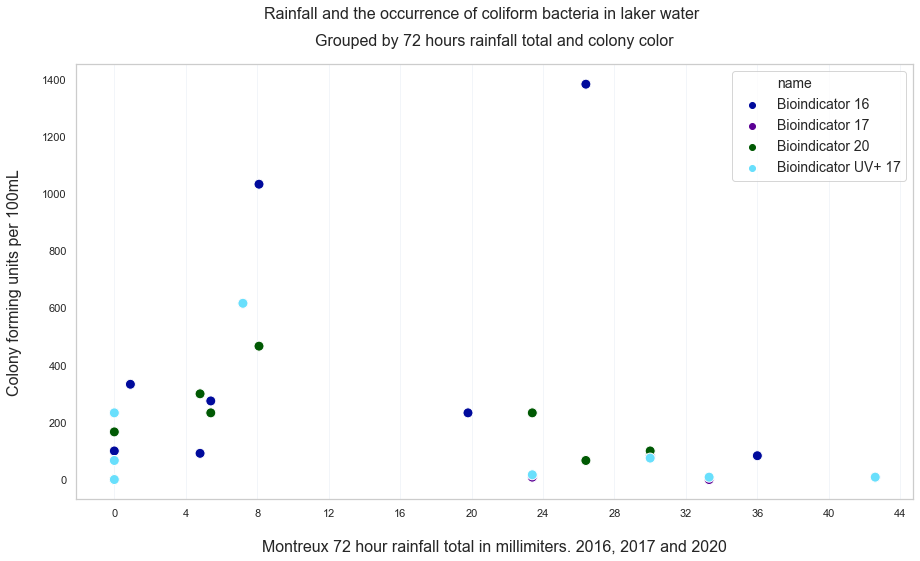

In [19]:
make_rain_sum(rain_sum_df[rain_sum_df.name.str.contains('Bioindicator')].round(decimals=5), 
              'Rainfall_sum_2016_2017_2020', 
              ['#000A9C', '#5B0094', '#005903', '#68DFFC'])


In [20]:
def make_rain_sum_2016_2017(df, fname, colors):
    #colors = ['#000A9C', '#5B0094', '#68DFFC', '#4275FF', '#C973FF']
    #colors = ['#00008b', '#8b008b', '#008000', '#468b00', '#add8e6', '#ffb6c1', '#90ee90']
    fig, ax = plt.subplots(figsize=(15,8))
    
    ax=sns.scatterplot(x='rain', y='cfu', hue='name', data=df,  alpha=1, s=100, linewidth=1, edgecolor='w', palette=colors, legend='full')

    ax.xaxis.grid(which="major", color='b', linewidth=0.7, alpha=0.1)
    ax.set_xlabel("Montreux 72 hour rainfall total in millimiters. 2016 and 2017", size=16, labelpad=20)
    ax.set_ylabel("Colony forming units per 100mL", size=16, labelpad=20)
    plt.suptitle("Rainfall and the occurrence of coliform bacteria in laker water" , fontsize=16, family='sans')
    plt.title("Grouped by 72 hours rainfall total and colony color", fontsize=16, family='sans', y=1.03)
    ax.legend(loc='upper right', fontsize=14)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))#mticker.MultipleLocator(1))

    save_plot(fname)

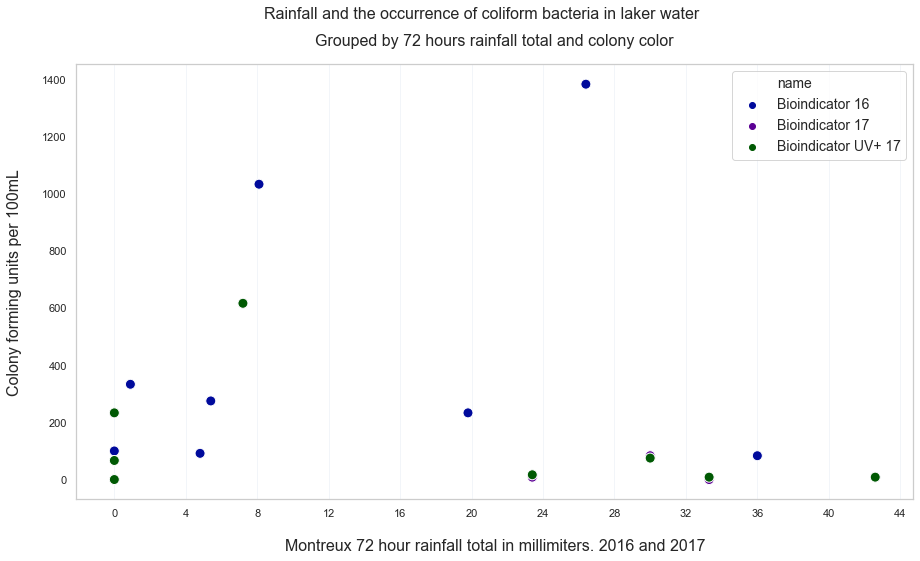

In [21]:
make_rain_sum_2016_2017(rain_sum_df[rain_sum_df.name.str.contains('Bioindicator')].query('year != 60').round(decimals=5), 
                        'Rainfall_sum_2016_2017', 
                        ['#000A9C', '#5B0094', '#005903'])

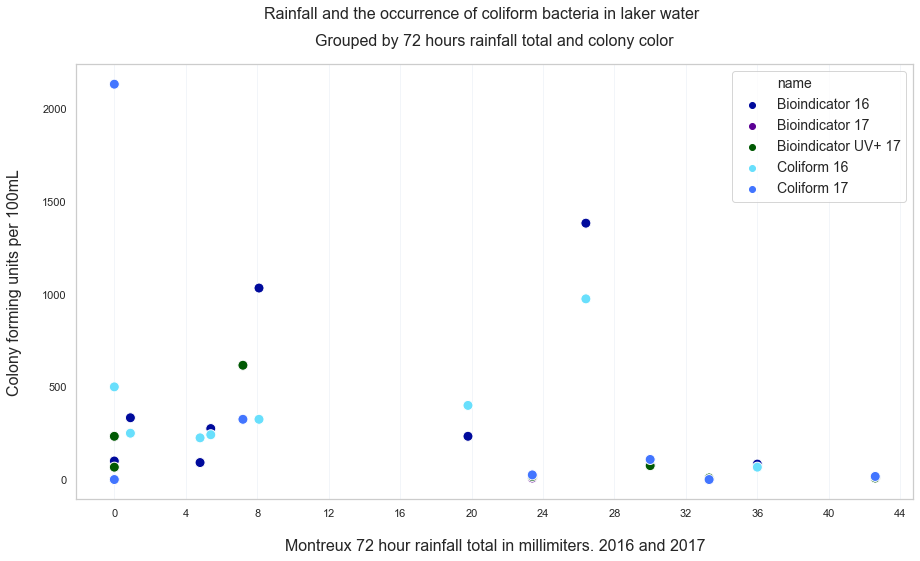

In [22]:
make_rain_sum_2016_2017(rain_sum_df.query('year != 60').round(decimals=2), 
                        'Rainfall_sum_2016_2017', 
                        ['#000A9C', '#5B0094', '#005903', '#68DFFC', '#4275FF'])

## Results before, during and after

In [23]:
#A=pd.read_pickle("data/allyears.pkl")
A=pd.read_pickle("data/allyears-avg_plate.pkl")
A['Date_dt'] = pd.to_datetime(A['Date'])
A2=append_vars(A,['Bioindicator', 'Bioindicator UV+', 'Coliform'])

In [24]:
festival = A2.query('year != 20')
nofestival = A2.query('year == 20').copy()
nofestival['festival'] = 'No festival'

barplot = pd.concat([festival, nofestival])
barplot = barplot[barplot.name.str.contains('Bioindicator')].query('name != "Bioindicator UV+ 17"')
barplot

,Date,Location,festival,rooms,year,rain,total,week,Date_dt,cfu,name
0,2016-06-21,MRD,before,3069.600000,16,0.0,900.000000,1,2016-06-21,66.666667,Bioindicator 16
1,2016-06-21,SVT,before,3069.600000,16,0.0,133.333333,1,2016-06-21,33.333333,Bioindicator 16
2,2016-06-21,VNX,before,3069.600000,16,0.0,66.666667,1,2016-06-21,0.000000,Bioindicator 16
3,2016-06-28,MRD,before,3069.600000,16,1.6,491.666667,2,2016-06-28,8.333333,Bioindicator 16
4,2016-06-28,SVT,before,3069.600000,16,1.6,391.666667,2,2016-06-28,0.000000,Bioindicator 16
...,...,...,...,...,...,...,...,...,...,...,...
67,2020-07-22,SVT,No festival,8058.967742,20,7.8,6066.666667,7,2020-07-22,100.000000,Bioindicator 20
68,2020-07-22,VNX,No festival,8058.967742,20,7.8,666.666667,7,2020-07-22,0.000000,Bioindicator 20
69,2020-08-06,MRD,No festival,7890.741935,20,1.8,3100.000000,8,2020-08-06,0.000000,Bioindicator 20
70,2020-08-06,SVT,No festival,7890.741935,20,1.8,3366.666667,8,2020-08-06,166.666667,Bioindicator 20


## With Statistics annotations

### Permutation Test

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.10e-02 < p <= 5.00e-02
**: 1.10e-03 < p <= 1.10e-02
***: 1.10e-04 < p <= 1.10e-03
****: p <= 1.10e-04

before v.s. during: Custom statistical test, P_val:1.000e-04
during v.s. after: Custom statistical test, P_val:3.590e-02
before v.s. after: Custom statistical test, P_val:1.020e-01


(<AxesSubplot:title={'center':'colony forming units per 100mL; n=XX'}, xlabel='Results grouped in relation to Montreux Jazz Festival', ylabel='$\\itE. coli$ colony forming units per 100mL'>,
  <statannot.StatResult.StatResult at 0x1280d2910>])

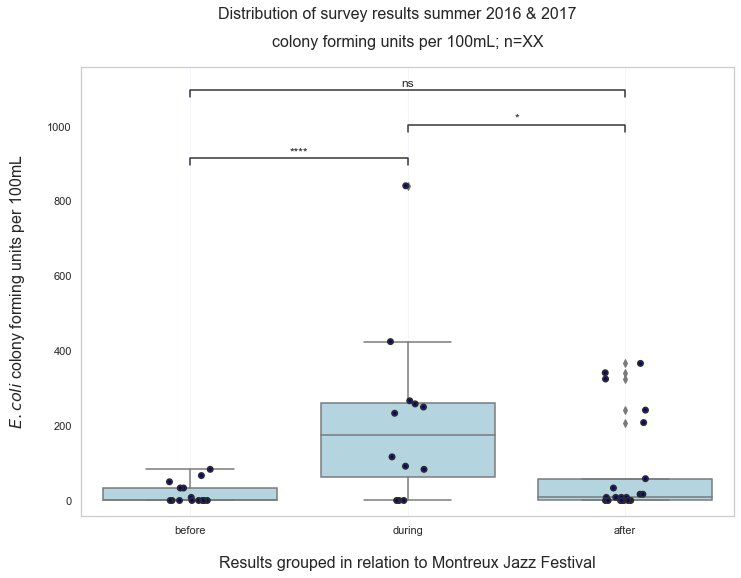

In [25]:
from statannot import add_stat_annotation

data = barplot.query('year != 20')
x = "festival"
y = "cfu"
order= ['before', 'during', 'after']

box_pairs=[("before", "during"), ("before", "after"), ("during", "after")]

#from scipy.stats import brunnermunzel

test_short_name = 'Permutation Test'
pvalues = [0.0001,0.1020,0.0359]



ax = sns.boxplot(x=x, y=y, data=data, order=order, color='lightblue')
sns.stripplot(ax=ax, x=x, y=y, data=data, alpha=1, linewidth=2, order=order, color='darkblue')

ax.xaxis.grid(which="major", color='b', linewidth=0.7, alpha=0.1)
ax.set_xlabel("Results grouped in relation to Montreux Jazz Festival", size=16, labelpad=20)
ax.set_ylabel("$\itE. coli$ colony forming units per 100mL", size=16, labelpad=20)
plt.suptitle("Distribution of survey results summer 2016 & 2017" , fontsize=16, family='sans')
plt.title("colony forming units per 100mL; n=XX", fontsize=16, family='sans', y=1.03)

test_results = add_stat_annotation(ax, data=data, x=x, y=y,
                                   box_pairs=box_pairs,
                                   perform_stat_test=False, pvalues=pvalues, test_short_name=test_short_name,
                                   pvalue_thresholds=[[1.1e-4, "****"], [1.1e-3, "***"], [1.1e-2, "**"], [0.05, "*"], [1, "ns"]],text_format='star', verbose=2)
test_results

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.10e-02 < p <= 5.00e-02
**: 1.10e-03 < p <= 1.10e-02
***: 1.10e-04 < p <= 1.10e-03
****: p <= 1.10e-04

before v.s. during: Custom statistical test, P_val:1.000e-04
during v.s. after: Custom statistical test, P_val:3.590e-02
after v.s. No festival: Custom statistical test, P_val:1.000e-04
before v.s. after: Custom statistical test, P_val:1.020e-01
during v.s. No festival: Custom statistical test, P_val:1.000e-04
before v.s. No festival: Custom statistical test, P_val:1.000e-04


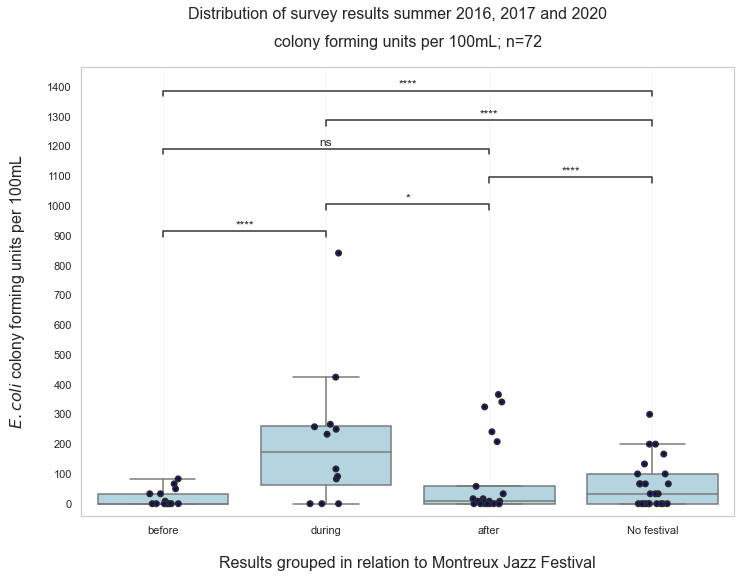

In [152]:
import matplotlib.ticker as ticker

data = barplot
x = "festival"
y = "cfu"
order= ['before', 'during', 'after', 'No festival']

box_pairs=[("before", "during"), ("before", "after"), ("during", "after"),
           ("before","No festival"), ("during","No festival"), ("after","No festival")]

test_short_name = 'Permutation Test'
pvalues = [0.0001,0.1020,0.0359, 0.0001, 0.0001,0.0001 ]


ax = sns.boxplot(x=x, y=y, data=data, order=order, color='lightblue', showfliers=False)
sns.stripplot(ax=ax, x=x, y=y, data=data, alpha=1, linewidth=2, order=order, color='darkblue')

ax.xaxis.grid(which="major", color='b', linewidth=0.7, alpha=0.1)
ax.set_xlabel("Results grouped in relation to Montreux Jazz Festival", size=16, labelpad=20)
ax.set_ylabel("$\itE. coli$ colony forming units per 100mL", size=16, labelpad=20)
plt.suptitle("Distribution of survey results summer 2016, 2017 and 2020" , fontsize=16, family='sans')
plt.title(f"colony forming units per 100mL; n={len(barplot)}", fontsize=16, family='sans', y=1.03)
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))


test_results = add_stat_annotation(ax, data=data, x=x, y=y, order=order, fontsize='medium',
                                   box_pairs=box_pairs,
                                   perform_stat_test=False, pvalues=pvalues, test_short_name=test_short_name,
                                   show_test_name=False,text_format='star',
                                   pvalue_thresholds=[[1.1e-4, "****"], [1.1e-3, "***"], [1.1e-2, "**"], [0.05, "*"], [1, "ns"]],verbose=2)
test_results

plt.savefig(f"plots/permutation_test_distribution.svg")
plt.savefig(f"plots/permutation_test_distribution.png")

The confidence interval should be extracted manually

Median c.i. for before goes from 0.0 to 33.333333333333336 and a median of 0.0
Median c.i. for during goes from 62.5 to 260.4166666666667 and a median of 175.0
Median c.i. for after goes from 0.0 to 58.333333333333336 and a median of 8.333333333333334
Median c.i. for No festival goes from 0.0 to 100.0 and a median of 33.333333333333336


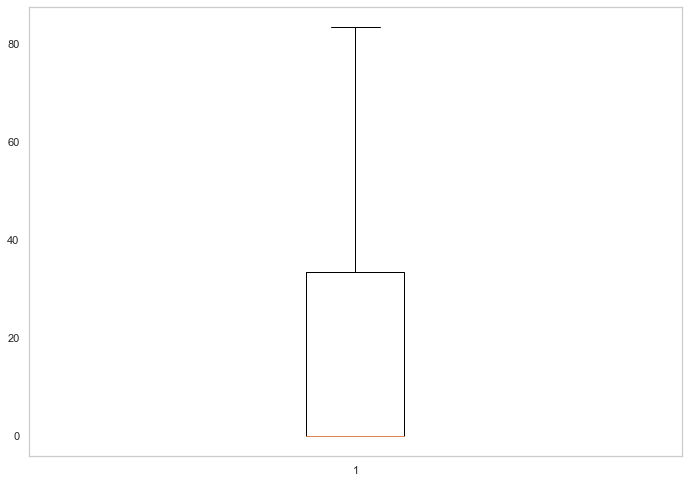

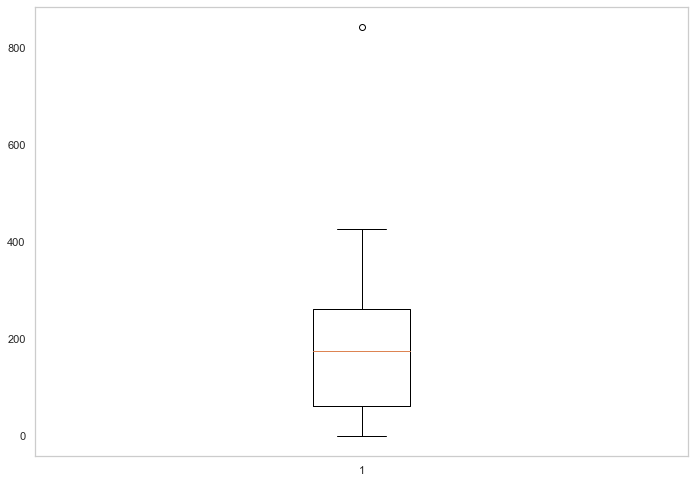

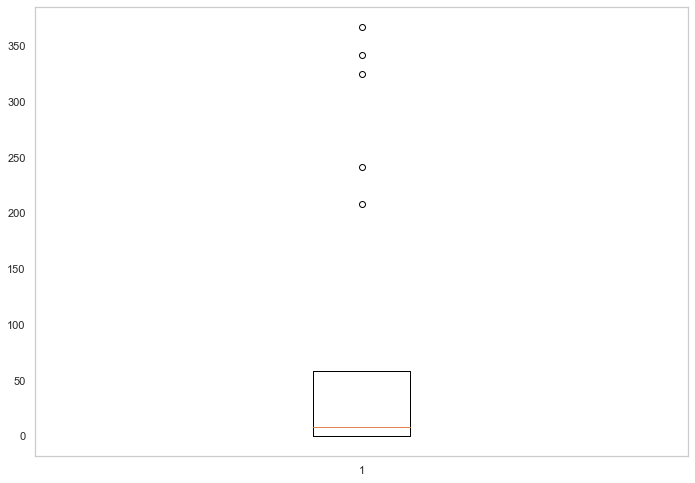

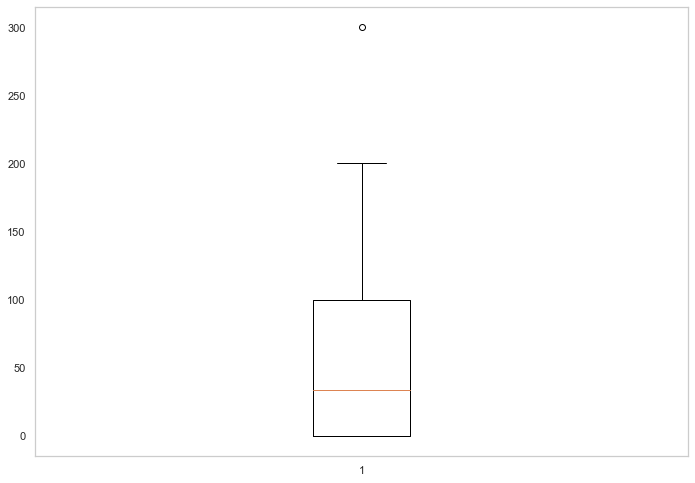

In [138]:
fig1, ax1 = plt.subplots()
a = ax1.boxplot(barplot.query('festival == "before"')["cfu"])
print('Median c.i. for before goes from {} to {} and a median of {}'.format(ax1.lines[0].get_xydata()[1][1]
,ax1.lines[0].get_xydata()[2][1], ax1.lines[5].get_xydata()[0][1]))

fig1, ax1 = plt.subplots()
a = ax1.boxplot(barplot.query('festival == "during"')["cfu"])
print('Median c.i. for during goes from {} to {} and a median of {}'.format(ax1.lines[0].get_xydata()[1][1]
,ax1.lines[0].get_xydata()[2][1], ax1.lines[5].get_xydata()[0][1]))

fig1, ax1 = plt.subplots()
a = ax1.boxplot(barplot.query('festival == "after"')["cfu"])
print('Median c.i. for after goes from {} to {} and a median of {}'.format(ax1.lines[0].get_xydata()[1][1]
,ax1.lines[0].get_xydata()[2][1], ax1.lines[5].get_xydata()[0][1]))

fig1, ax1 = plt.subplots()
a = ax1.boxplot(barplot.query('festival == "No festival"')["cfu"])
print('Median c.i. for No festival goes from {} to {} and a median of {}'.format(ax1.lines[0].get_xydata()[1][1]
,ax1.lines[0].get_xydata()[2][1], ax1.lines[5].get_xydata()[0][1]))
